In [6]:
import pandas as pd
soil=pd.read_csv("dataset1.csv")

In [7]:
soil.head()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.9,0.24,0.31,0.77,8.71,0.11,0
1,213,7.5,338,7.62,0.75,1.06,25.4,0.30,0.86,1.54,2.89,2.29,0
2,163,9.6,718,7.59,0.51,1.11,14.3,0.30,0.86,1.57,2.70,2.03,0
3,157,6.8,475,7.64,0.58,0.94,26.0,0.34,0.54,1.53,2.65,1.82,0
4,270,9.9,444,7.63,0.40,0.86,11.8,0.25,0.76,1.69,2.43,2.26,1


In [8]:
soil.nunique()

N          61
P          92
K          62
pH        107
EC         71
OC         68
S         153
Zn         70
Fe        387
Cu        166
Mn        429
B         127
Output      3
dtype: int64

In [9]:
soil.isna()

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,False,False,False,False,False,False,False,False,False,False,False,False,False
876,False,False,False,False,False,False,False,False,False,False,False,False,False
877,False,False,False,False,False,False,False,False,False,False,False,False,False
878,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
Q1 = soil.quantile(0.25)
Q3 = soil.quantile(0.75)
IQR=Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
soil_filtered = soil[~((soil < lower_bound) | (soil > upper_bound)).any(axis=1)]

In [11]:
soil_filtered

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Output
0,138,8.6,560,7.46,0.62,0.70,5.90,0.24,0.31,0.77,8.71,0.11,0
19,245,8.1,560,7.31,0.63,0.78,11.60,0.29,0.43,0.57,7.73,0.74,0
28,245,8.3,560,7.58,0.74,0.83,8.20,0.32,0.96,1.57,2.67,0.59,0
41,182,10.7,708,7.48,0.57,1.11,14.20,0.59,0.92,1.15,6.69,0.65,0
50,107,8.3,612,7.43,0.43,0.75,7.20,0.18,0.95,0.89,2.16,0.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,351,10.7,623,7.96,0.51,0.29,7.24,0.36,4.69,0.69,11.03,0.69,1
876,264,9.0,486,7.24,0.47,0.10,3.92,0.35,8.26,0.45,7.98,0.40,1
877,276,9.2,370,7.62,0.62,0.49,6.64,0.42,3.57,0.63,6.48,0.32,1
878,320,13.8,391,7.38,0.65,1.07,5.43,0.58,4.58,1.02,13.25,0.53,2


In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = soil_filtered.drop(['EC','OC','S','Zn','Fe','Cu','Mn','B','Output'],axis=1)
y = soil_filtered['Output']

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [14]:
scale=MinMaxScaler()
X_train_normalized=scale.fit_transform(X_train)
X_test_normalized=scale.fit_transform(X_test)

In [15]:
print(X_train_normalized)

[[0.63302752 0.29770992 0.39255499 0.13333333]
 [0.40366972 0.59541985 0.78680203 0.45714286]
 [0.90214067 0.11450382 0.74957699 0.95238095]
 ...
 [0.65443425 0.32824427 0.34010152 0.44761905]
 [0.67278287 0.38167939 0.62436548 0.47619048]
 [0.4617737  0.36641221 0.14213198 0.47619048]]


In [16]:
print(X_test_normalized)

[[0.96091205 0.45299145 0.23076923 0.60576923]
 [0.42996743 0.35897436 0.14595661 0.63461538]
 [0.20521173 0.35897436 0.16765286 0.42307692]
 [0.20521173 0.37606838 0.47928994 0.61538462]
 [0.69381107 0.45299145 0.23076923 0.63461538]
 [0.63192182 0.35897436 0.75147929 0.61538462]
 [0.96091205 0.52991453 0.68836292 0.04807692]
 [0.46905537 0.47008547 0.37672584 0.13461538]
 [0.         0.37606838 0.47928994 0.42307692]
 [0.73615635 0.47008547 0.75147929 0.13461538]
 [0.79478827 0.26495726 0.33333333 1.        ]
 [0.8990228  0.15384615 0.87573964 1.        ]
 [0.7752443  0.54700855 0.31360947 0.03846154]
 [0.59283388 0.30769231 0.29191321 0.625     ]
 [0.85667752 0.24786325 0.45956607 0.80769231]
 [0.42996743 0.07692308 0.33333333 0.42307692]
 [0.65472313 0.32478632 0.2504931  0.23076923]
 [0.98045603 0.32478632 0.68836292 0.90384615]
 [0.7752443  0.24786325 0.56410256 0.51923077]
 [0.83713355 0.35897436 0.33333333 0.61538462]
 [0.96091205 0.64102564 0.29191321 0.80769231]
 [0.65472313 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_normalized,y_train)
KNN_SCORE = KNN.score(X_test_normalized,y_test)

In [18]:
KNN_SCORE

0.896

In [19]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier as rf

rf_classifier = rf(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_normalized,y_train)

predicted_values = rf_classifier.predict(X_test_normalized)
x = metrics.accuracy_score(y_test, predicted_values)
acc=[]
model=[]
acc.append(x)
model.append('Random Forest')
print("Random Forest's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Random Forest's Accuracy is:  0.944
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        65
           1       0.95      0.93      0.94        58
           2       0.50      0.50      0.50         2

    accuracy                           0.94       125
   macro avg       0.80      0.80      0.80       125
weighted avg       0.94      0.94      0.94       125



In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
gbc=GradientBoostingClassifier()
gbc.fit(X_train_normalized,y_train)


GradientBoostingClassifier()

In [21]:
y_pred=gbc.predict(X_test_normalized)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.944


In [22]:
from sklearn.neural_network import MLPClassifier

In [23]:
from sklearn.model_selection import cross_val_score
clf = MLPClassifier(hidden_layer_sizes=(64,),activation='tanh' ,max_iter=100, alpha=1e-3,
                    solver='sgd', verbose=2, random_state=42,
                    learning_rate_init=0.001)
scores = cross_val_score(clf, X, y, cv=5)
print("Mean cross-validation score:", scores.mean())
clf.fit(X, y)
predictions = clf.predict(X_test)
print(predictions)
test_accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {test_accuracy}")

Iteration 1, loss = 1.29034886
Iteration 2, loss = 0.97896367
Iteration 3, loss = 0.67778384
Iteration 4, loss = 0.65026401
Iteration 5, loss = 0.64194216
Iteration 6, loss = 0.63065286
Iteration 7, loss = 0.62537085
Iteration 8, loss = 0.62051274
Iteration 9, loss = 0.61559875
Iteration 10, loss = 0.61590430
Iteration 11, loss = 0.61278792
Iteration 12, loss = 0.60620735
Iteration 13, loss = 0.60024183
Iteration 14, loss = 0.60081100
Iteration 15, loss = 0.59755656
Iteration 16, loss = 0.59565927
Iteration 17, loss = 0.59075386
Iteration 18, loss = 0.59478641
Iteration 19, loss = 0.59263156
Iteration 20, loss = 0.59160358
Iteration 21, loss = 0.58955024
Iteration 22, loss = 0.58601953
Iteration 23, loss = 0.58720426
Iteration 24, loss = 0.58945189
Iteration 25, loss = 0.58495346
Iteration 26, loss = 0.58363418
Iteration 27, loss = 0.58122601
Iteration 28, loss = 0.58179587
Iteration 29, loss = 0.57773443
Iteration 30, loss = 0.58579193
Iteration 31, loss = 0.57723340
Iteration 32, los

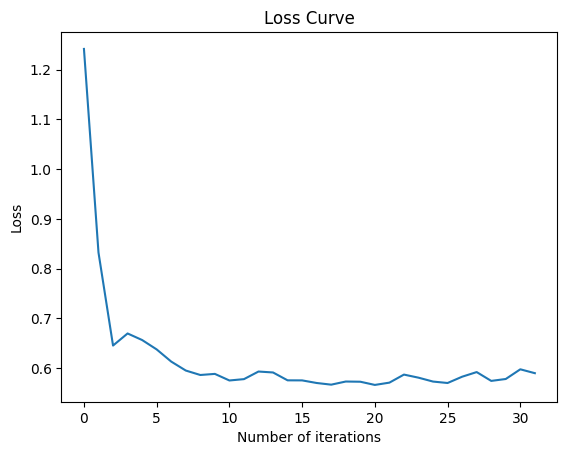

0.565819717156101


In [24]:
import matplotlib.pyplot as plt
plt.plot(clf.loss_curve_)
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()
min_loss=min(clf.loss_curve_)
print(min_loss)

In [35]:
import numpy as np
data=np.array([[245,7.5,422,8]])
predictions=gbc.predict(data)
print(predictions)

[1]


In [36]:
import numpy as np
data=np.array([[282,9.2,388,7.4]])
predictions=gbc.predict(data)
print(predictions)


[1]


In [37]:
import numpy as np
data=np.array([[195,5.9,422,7.66]])
predictions=gbc.predict(data)
print(predictions)


[1]
